In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json
from os.path import expanduser

In [2]:
experiment_name = 'P3830'
feature_detection_method = 'pasef'

In [3]:
MAXIMUM_Q_VALUE = 0.01

In [4]:
PROTEIN_APPEARS_IN_REPLICATES = 1

In [5]:
BASE_RESULTS_DIR = '/media/big-ssd'
# BASE_RESULTS_DIR = '/Users/darylwilding-mcbride/Downloads'.format(experiment_name)

### analyse UPS2

#### identifications with correction for saturation

In [6]:
IDENTIFICATIONS_WITH_CS_DIR = '/media/data-4t-a/results-P3830_YUPS2/2021-10-11-12-21-21/identifications-pasef'
IDENTIFICATIONS_WITH_CS_FILE = '{}/exp-P3830_YUPS2-identifications-pasef-recalibrated.feather'.format(IDENTIFICATIONS_WITH_CS_DIR)

In [7]:
# load the identifications
identifications_with_cs_df = pd.read_feather(IDENTIFICATIONS_WITH_CS_FILE)
identifications_with_cs_df = identifications_with_cs_df[(identifications_with_cs_df['percolator q-value'] <= MAXIMUM_Q_VALUE) & (~identifications_with_cs_df['protein id'].str.contains('YEAST'))]
identifications_with_cs_df['short_run_name'] = identifications_with_cs_df.apply(lambda row: '_'.join(row.run_name.split('_Slot')[0].split('_')[1:]), axis=1)
identifications_with_cs_df['protein id'] = identifications_with_cs_df.apply(lambda row: row['protein id'].split(',')[0], axis=1)

In [8]:
s1 = identifications_with_cs_df.mono_intensity_adjustment_outcome.value_counts(normalize=False).rename('counts', inplace=True)
s2 = round(identifications_with_cs_df.mono_intensity_adjustment_outcome.value_counts(normalize=True)*100,1).rename('%', inplace=True)
pd.concat([s1, s2], axis=1)

,counts,%
monoisotopic_not_saturated,2517,82.0
monoisotopic_saturated_adjusted,542,17.7
no_nonsaturated_isotopes,11,0.4


In [9]:
print('number of unique proteins: {}'.format(len(identifications_with_cs_df['protein id'].unique())))

number of unique proteins: 23


#### identifications without correction for saturation

In [10]:
IDENTIFICATIONS_WITHOUT_CS_DIR = '/media/data-4t-a/results-P3830_YUPS2/2021-10-14-15-43-30/identifications-pasef'
IDENTIFICATIONS_WITHOUT_CS_FILE = '{}/exp-P3830_YUPS2-identifications-pasef-recalibrated.feather'.format(IDENTIFICATIONS_WITHOUT_CS_DIR)

In [11]:
# load the identifications
identifications_without_cs_df = pd.read_feather(IDENTIFICATIONS_WITHOUT_CS_FILE)
identifications_without_cs_df = identifications_without_cs_df[(identifications_without_cs_df['percolator q-value'] <= MAXIMUM_Q_VALUE) & (~identifications_without_cs_df['protein id'].str.contains('YEAST'))]
identifications_without_cs_df['short_run_name'] = identifications_without_cs_df.apply(lambda row: '_'.join(row.run_name.split('_Slot')[0].split('_')[1:]), axis=1)
identifications_without_cs_df['protein id'] = identifications_without_cs_df.apply(lambda row: row['protein id'].split(',')[0], axis=1)

In [12]:
print('number of unique proteins: {}'.format(len(identifications_without_cs_df['protein id'].unique())))

number of unique proteins: 23


#### using the Top3 approach to determine protein quantification

In [13]:
ups2_proteins_l = []

ups2_proteins_l.append({'uniprot':'P00915', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P00918', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P01031', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P69905', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P68871', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P41159', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P02768', 'fmoles':50000})
ups2_proteins_l.append({'uniprot':'P62988', 'fmoles':50000})

ups2_proteins_l.append({'uniprot':'P04040', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P00167', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P01133', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P02144', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P15559', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P62937', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'Q06830', 'fmoles':5000})
ups2_proteins_l.append({'uniprot':'P63165', 'fmoles':5000})

ups2_proteins_l.append({'uniprot':'P00709', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P06732', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P12081', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P61626', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'Q15843', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P02753', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P16083', 'fmoles':500})
ups2_proteins_l.append({'uniprot':'P63279', 'fmoles':500})

ups2_proteins_l.append({'uniprot':'P01008', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P61769', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P55957', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'O76070', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P08263', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P01344', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P01127', 'fmoles':50})
ups2_proteins_l.append({'uniprot':'P10599', 'fmoles':50})

ups2_proteins_l.append({'uniprot':'P99999', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P06396', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P09211', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P01112', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P01579', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P02787', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'O00762', 'fmoles':5})
ups2_proteins_l.append({'uniprot':'P51965', 'fmoles':5})

ups2_proteins_l.append({'uniprot':'P08758', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P02741', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P05413', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P10145', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P02788', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P10636-8', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P00441', 'fmoles':0.5})
ups2_proteins_l.append({'uniprot':'P01375', 'fmoles':0.5})

ups2_d = {}
for p in ups2_proteins_l:
    ups2_d[p['uniprot']] = p['fmoles']

#### with correction

In [14]:
identifications_with_cs_df['protein id'].unique()

array(['P02768ups|ALBU_HUMAN_UPS', 'P00915ups|CAH1_HUMAN_UPS',
       'P00918ups|CAH2_HUMAN_UPS', 'P68871ups|HBB_HUMAN_UPS',
       'P41159ups|LEP_HUMAN_UPS', 'P69905ups|HBA_HUMAN_UPS',
       'P01031ups|CO5_HUMAN_UPS', 'P62988ups|UBIQ_HUMAN_UPS',
       'Q06830ups|PRDX1_HUMAN_UPS', 'P04040ups|CATA_HUMAN_UPS',
       'P02144ups|MYG_HUMAN_UPS', 'P00167ups|CYB5_HUMAN_UPS',
       'P12081ups|SYHC_HUMAN_UPS', 'P62937ups|PPIA_HUMAN_UPS',
       'P15559ups|NQO1_HUMAN_UPS', 'P06732ups|KCRM_HUMAN_UPS',
       'P00709ups|LALBA_HUMAN_UPS', 'P63165ups|SUMO1_HUMAN_UPS',
       'P01133ups|EGF_HUMAN_UPS', 'Q15843ups|NEDD8_HUMAN_UPS',
       'P02753ups|RETBP_HUMAN_UPS', 'P16083ups|NQO2_HUMAN_UPS',
       'P06396ups|GELS_HUMAN_UPS'], dtype=object)

In [15]:
# find the three most intense peptides for each protein
top3_l = []
for group_name,group_df in identifications_with_cs_df.groupby(['short_run_name','protein id']):
    short_run_name = group_name[0]
    protein_name = group_name[1]
    df = group_df.sort_values(by=['feature_intensity'], ascending=False, inplace=False)
    top3_df = df.head(n=3)
    if len(top3_df) == 3:
        uniprot_id = protein_name.split('ups')[0]
        pmoles = ups2_d[uniprot_id] / 1000
        average_intensity = top3_df.feature_intensity.mean()
        signal_response_factor = average_intensity / pmoles
        peptide_count = len(df)
        intensity_adjusted = 'monoisotopic_saturated_adjusted' in list(top3_df.mono_intensity_adjustment_outcome)
        attribs_d = top3_df[['feature_id','sequence','charge','feature_intensity']].to_dict('records')
        top3_l.append({'short_run_name':short_run_name, 'protein':protein_name, 'pmoles':pmoles, 'average_intensity':average_intensity, 'signal_response_factor':signal_response_factor, 'peptide_count':peptide_count, 'intensity_adjusted':intensity_adjusted, 'attribs_d':attribs_d})
    else:
        print('{} didn\'t have three peptides for {}'.format(short_run_name, protein_name))
top3_with_df = pd.DataFrame(top3_l)

YeastUPS2_01 didn't have three peptides for P00167ups|CYB5_HUMAN_UPS
YeastUPS2_01 didn't have three peptides for P00709ups|LALBA_HUMAN_UPS
YeastUPS2_01 didn't have three peptides for P06732ups|KCRM_HUMAN_UPS
YeastUPS2_01 didn't have three peptides for P15559ups|NQO1_HUMAN_UPS
YeastUPS2_01 didn't have three peptides for P62988ups|UBIQ_HUMAN_UPS
YeastUPS2_02 didn't have three peptides for P00709ups|LALBA_HUMAN_UPS
YeastUPS2_02 didn't have three peptides for P01133ups|EGF_HUMAN_UPS
YeastUPS2_02 didn't have three peptides for P06732ups|KCRM_HUMAN_UPS
YeastUPS2_02 didn't have three peptides for P62988ups|UBIQ_HUMAN_UPS
YeastUPS2_02 didn't have three peptides for Q15843ups|NEDD8_HUMAN_UPS
YeastUPS2_03 didn't have three peptides for P00709ups|LALBA_HUMAN_UPS
YeastUPS2_03 didn't have three peptides for P06732ups|KCRM_HUMAN_UPS
YeastUPS2_03 didn't have three peptides for P12081ups|SYHC_HUMAN_UPS
YeastUPS2_03 didn't have three peptides for P16083ups|NQO2_HUMAN_UPS
YeastUPS2_03 didn't have three 

In [16]:
top3_with_df

,short_run_name,protein,pmoles,average_intensity,signal_response_factor,peptide_count,intensity_adjusted,attribs_d
0,YeastUPS2_01,P00915ups|CAH1_HUMAN_UPS,50.0,51585.000000,1031.700000,20,True,"[{'feature_id': 829701, 'sequence': 'HDTSLKPIS..."
1,YeastUPS2_01,P00918ups|CAH2_HUMAN_UPS,50.0,50821.333333,1016.426667,18,True,"[{'feature_id': 2161501, 'sequence': 'YDPSLKPL..."
2,YeastUPS2_01,P01031ups|CO5_HUMAN_UPS,50.0,38016.333333,760.326667,4,True,"[{'feature_id': 613701, 'sequence': 'CCYDGACVN..."
3,YeastUPS2_01,P02144ups|MYG_HUMAN_UPS,5.0,6117.333333,1223.466667,6,False,"[{'feature_id': 1141101, 'sequence': 'VEADIPGH..."
4,YeastUPS2_01,P02768ups|ALBU_HUMAN_UPS,50.0,115886.000000,2317.720000,141,True,"[{'feature_id': 4736101, 'sequence': 'MPCAEDYL..."
...,...,...,...,...,...,...,...,...
140,YeastUPS2_10,P62988ups|UBIQ_HUMAN_UPS,50.0,18820.666667,376.413333,3,True,"[{'feature_id': 2414101, 'sequence': 'TITLEVEP..."
141,YeastUPS2_10,P63165ups|SUMO1_HUMAN_UPS,5.0,3435.333333,687.066667,3,False,"[{'feature_id': 854202, 'sequence': 'VIGQDSSEI..."
142,YeastUPS2_10,P68871ups|HBB_HUMAN_UPS,50.0,45045.333333,900.906667,13,True,"[{'feature_id': 2774801, 'sequence': 'VLGAFSDG..."
143,YeastUPS2_10,P69905ups|HBA_HUMAN_UPS,50.0,18385.000000,367.700000,16,True,"[{'feature_id': 3146301, 'sequence': 'KVADALTN..."


In [17]:
len(top3_with_df.protein.unique())

17

In [18]:
# using Serum albumin (P02768) as an internal reference
universal_signal_response_factor = top3_with_df[top3_with_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor
universal_signal_response_factor

2317.72

In [19]:
top3_with_df['calculated_pmoles'] = top3_with_df.average_intensity / universal_signal_response_factor

In [20]:
# calculate the CV for the signal response factor
cv = top3_with_df.signal_response_factor.std() / top3_with_df.signal_response_factor.mean()
cv

1.2170090470187278

In [21]:
'{}% of proteins had at least one of their top-3 peptides adjusted for saturation'.format(round(len(top3_with_df[(top3_with_df.intensity_adjusted == True)]) / len(top3_with_df) * 100,1))

'64.1% of proteins had at least one of their top-3 peptides adjusted for saturation'

#### without correction

In [22]:
# find the three most intense peptides for each protein
top3_l = []
for group_name,group_df in identifications_without_cs_df.groupby(['short_run_name','protein id']):
    short_run_name = group_name[0]
    protein_name = group_name[1]
    df = group_df.sort_values(by=['feature_intensity'], ascending=False, inplace=False)
    top3_df = df.head(n=3)
    if len(top3_df) == 3:
        uniprot_id = protein_name.split('ups')[0]
        pmoles = ups2_d[uniprot_id] / 1000
        average_intensity = top3_df.feature_intensity.mean()
        signal_response_factor = average_intensity / pmoles
        peptide_count = len(df)
        attribs_d = top3_df[['feature_id','sequence','charge','feature_intensity']].to_dict('records')
        top3_l.append({'short_run_name':short_run_name, 'protein':protein_name, 'pmoles':pmoles, 'average_intensity':average_intensity, 'signal_response_factor':signal_response_factor, 'peptide_count':peptide_count, 'attribs_d':attribs_d})
    else:
        print('{} didn\'t have three peptides for {}'.format(short_run_name, protein_name))
top3_without_df = pd.DataFrame(top3_l)

YeastUPS2_01 didn't have three peptides for P00167ups|CYB5_HUMAN_UPS
YeastUPS2_01 didn't have three peptides for P00709ups|LALBA_HUMAN_UPS
YeastUPS2_01 didn't have three peptides for P06732ups|KCRM_HUMAN_UPS
YeastUPS2_01 didn't have three peptides for P15559ups|NQO1_HUMAN_UPS
YeastUPS2_01 didn't have three peptides for P62988ups|UBIQ_HUMAN_UPS
YeastUPS2_02 didn't have three peptides for P00709ups|LALBA_HUMAN_UPS
YeastUPS2_02 didn't have three peptides for P01133ups|EGF_HUMAN_UPS
YeastUPS2_02 didn't have three peptides for P06732ups|KCRM_HUMAN_UPS
YeastUPS2_02 didn't have three peptides for P62988ups|UBIQ_HUMAN_UPS
YeastUPS2_02 didn't have three peptides for Q15843ups|NEDD8_HUMAN_UPS
YeastUPS2_03 didn't have three peptides for P00709ups|LALBA_HUMAN_UPS
YeastUPS2_03 didn't have three peptides for P06732ups|KCRM_HUMAN_UPS
YeastUPS2_03 didn't have three peptides for P12081ups|SYHC_HUMAN_UPS
YeastUPS2_03 didn't have three peptides for P16083ups|NQO2_HUMAN_UPS
YeastUPS2_03 didn't have three 

In [23]:
len(top3_without_df.protein.unique())

17

In [24]:
# using Serum albumin (P02768) as an internal reference
universal_signal_response_factor = top3_without_df[top3_without_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor
universal_signal_response_factor

1715.1133333333335

In [25]:
top3_without_df['calculated_pmoles'] = top3_without_df.average_intensity / universal_signal_response_factor

In [26]:
# calculate the CV for the signal response factor
cv = top3_without_df.signal_response_factor.std() / top3_without_df.signal_response_factor.mean()
cv

1.1673358778283178

#### calculate correlation

In [27]:
combined_UPS2_df = pd.merge(top3_with_df, top3_without_df, how='inner', left_on=['short_run_name','protein'], right_on=['short_run_name','protein'], suffixes=['_with','_without'])

In [28]:
universal_signal_response_factor_with = combined_UPS2_df[combined_UPS2_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor_with
universal_signal_response_factor_without = combined_UPS2_df[combined_UPS2_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor_without

In [29]:
combined_UPS2_df['calculated_pmoles_with'] = combined_UPS2_df.average_intensity_with / universal_signal_response_factor_with
combined_UPS2_df['calculated_pmoles_without'] = combined_UPS2_df.average_intensity_without / universal_signal_response_factor_without

In [30]:
combined_UPS2_df['pmoles_with'].corr(combined_UPS2_df['calculated_pmoles_with'])

0.6353493197867336

In [31]:
combined_UPS2_df['pmoles_without'].corr(combined_UPS2_df['calculated_pmoles_without'])

0.6521577171439816

#### calculate experiment intensity means for each protein

In [32]:
experiment_means_l = []
for group_name,group_df in combined_UPS2_df.groupby(['protein']):
    if len(group_df.short_run_name.unique()) >= PROTEIN_APPEARS_IN_REPLICATES:
        mean_intensity_with = group_df.average_intensity_with.mean()
        mean_intensity_without = group_df.average_intensity_without.mean()
        experiment_means_l.append({'protein':group_name, 'mean_intensity_with':mean_intensity_with, 'mean_intensity_without':mean_intensity_without})
experiment_UPS2_means_df = pd.DataFrame(experiment_means_l)

In [33]:
experiment_UPS2_means_df

,protein,mean_intensity_with,mean_intensity_without
0,P00167ups|CYB5_HUMAN_UPS,9305.958333,9305.958333
1,P00915ups|CAH1_HUMAN_UPS,55278.433333,49377.433333
2,P00918ups|CAH2_HUMAN_UPS,58185.533333,49245.766667
3,P01031ups|CO5_HUMAN_UPS,34252.866667,21014.100000
4,P02144ups|MYG_HUMAN_UPS,6245.833333,6245.833333
5,P02768ups|ALBU_HUMAN_UPS,120906.866667,91316.133333
6,P04040ups|CATA_HUMAN_UPS,44455.500000,36880.266667
7,P06732ups|KCRM_HUMAN_UPS,2403.000000,2403.000000
8,P12081ups|SYHC_HUMAN_UPS,2858.250000,2858.250000
9,P15559ups|NQO1_HUMAN_UPS,5477.761905,5477.761905


### analyse UPS1

In [34]:
ups1_proteins_l = []

ups1_proteins_l.append({'uniprot':'P00915', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P00918', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P01031', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P69905', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P68871', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P41159', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P02768', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P62988', 'fmoles':5000})

ups1_proteins_l.append({'uniprot':'P04040', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P00167', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P01133', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P02144', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P15559', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P62937', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'Q06830', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P63165', 'fmoles':5000})

ups1_proteins_l.append({'uniprot':'P00709', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P06732', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P12081', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P61626', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'Q15843', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P02753', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P16083', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P63279', 'fmoles':5000})

ups1_proteins_l.append({'uniprot':'P01008', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P61769', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P55957', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'O76070', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P08263', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P01344', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P01127', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P10599', 'fmoles':5000})

ups1_proteins_l.append({'uniprot':'P99999', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P06396', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P09211', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P01112', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P01579', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P02787', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'O00762', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P51965', 'fmoles':5000})

ups1_proteins_l.append({'uniprot':'P08758', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P02741', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P05413', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P10145', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P02788', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P10636-8', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P00441', 'fmoles':5000})
ups1_proteins_l.append({'uniprot':'P01375', 'fmoles':5000})

ups1_d = {}
for p in ups1_proteins_l:
    ups1_d[p['uniprot']] = p['fmoles']

#### identifications with correction for saturation

In [35]:
IDENTIFICATIONS_UPS1_WITH_CS_DIR = '/media/data-4t-a/results-P3830_YUPS1/2021-10-10-01-59-26/identifications-pasef'
IDENTIFICATIONS_UPS1_WITH_CS_FILE = '{}/exp-P3830_YUPS1-identifications-pasef-recalibrated.feather'.format(IDENTIFICATIONS_UPS1_WITH_CS_DIR)

In [36]:
# load the identifications
identifications_UPS1_with_cs_df = pd.read_feather(IDENTIFICATIONS_UPS1_WITH_CS_FILE)
identifications_UPS1_with_cs_df = identifications_UPS1_with_cs_df[(identifications_UPS1_with_cs_df['percolator q-value'] <= MAXIMUM_Q_VALUE) & (~identifications_UPS1_with_cs_df['protein id'].str.contains('YEAST'))]
identifications_UPS1_with_cs_df['short_run_name'] = identifications_UPS1_with_cs_df.apply(lambda row: '_'.join(row.run_name.split('_Slot')[0].split('_')[1:]), axis=1)
identifications_UPS1_with_cs_df['protein id'] = identifications_UPS1_with_cs_df.apply(lambda row: row['protein id'].split(',')[0], axis=1)

In [37]:
s1 = identifications_UPS1_with_cs_df.mono_intensity_adjustment_outcome.value_counts(normalize=False).rename('counts', inplace=True)
s2 = round(identifications_UPS1_with_cs_df.mono_intensity_adjustment_outcome.value_counts(normalize=True)*100,1).rename('%', inplace=True)
pd.concat([s1, s2], axis=1)

,counts,%
monoisotopic_not_saturated,3184,90.8
monoisotopic_saturated_adjusted,323,9.2


In [38]:
print('number of unique proteins: {}'.format(len(identifications_UPS1_with_cs_df['protein id'].unique())))

number of unique proteins: 48


In [39]:
identifications_UPS1_with_cs_df['protein id'].unique()

array(['P02768ups|ALBU_HUMAN_UPS', 'P00441ups|SODC_HUMAN_UPS',
       'P10636-8ups|TAU_HUMAN_UPS', 'P08758ups|ANXA5_HUMAN_UPS',
       'O76070ups|SYUG_HUMAN_UPS', 'P02787ups|TRFE_HUMAN_UPS',
       'P01031ups|CO5_HUMAN_UPS', 'P04040ups|CATA_HUMAN_UPS',
       'P06396ups|GELS_HUMAN_UPS', 'Q15843ups|NEDD8_HUMAN_UPS',
       'Q06830ups|PRDX1_HUMAN_UPS', 'P00918ups|CAH2_HUMAN_UPS',
       'P12081ups|SYHC_HUMAN_UPS', 'P01008ups|ANT3_HUMAN_UPS',
       'P00709ups|LALBA_HUMAN_UPS', 'P10145ups|IL8_HUMAN_UPS',
       'P55957ups|BID_HUMAN_UPS', 'P00167ups|CYB5_HUMAN_UPS',
       'P02788ups|TRFL_HUMAN_UPS', 'P00915ups|CAH1_HUMAN_UPS',
       'P06732ups|KCRM_HUMAN_UPS', 'P68871ups|HBB_HUMAN_UPS',
       'P41159ups|LEP_HUMAN_UPS', 'O00762ups|UBE2C_HUMAN_UPS',
       'P15559ups|NQO1_HUMAN_UPS', 'P16083ups|NQO2_HUMAN_UPS',
       'P01133ups|EGF_HUMAN_UPS', 'P02144ups|MYG_HUMAN_UPS',
       'P09211ups|GSTP1_HUMAN_UPS', 'P01375ups|TNFA_HUMAN_UPS',
       'P05413ups|FABPH_HUMAN_UPS', 'P61769ups|B2MG_HUM

#### identifications without correction for saturation

In [40]:
IDENTIFICATIONS_UPS1_WITHOUT_CS_DIR = '/media/data-4t-a/results-P3830_YUPS1/2021-10-13-13-45-00/identifications-pasef'
IDENTIFICATIONS_UPS1_WITHOUT_CS_FILE = '{}/exp-P3830_YUPS1-identifications-pasef-recalibrated.feather'.format(IDENTIFICATIONS_UPS1_WITHOUT_CS_DIR)

In [41]:
# load the identifications
identifications_UPS1_without_cs_df = pd.read_feather(IDENTIFICATIONS_UPS1_WITHOUT_CS_FILE)
identifications_UPS1_without_cs_df = identifications_UPS1_without_cs_df[(identifications_UPS1_without_cs_df['percolator q-value'] <= MAXIMUM_Q_VALUE) & (~identifications_UPS1_without_cs_df['protein id'].str.contains('YEAST'))]
identifications_UPS1_without_cs_df['short_run_name'] = identifications_UPS1_without_cs_df.apply(lambda row: '_'.join(row.run_name.split('_Slot')[0].split('_')[1:]), axis=1)
identifications_UPS1_without_cs_df['protein id'] = identifications_UPS1_without_cs_df.apply(lambda row: row['protein id'].split(',')[0], axis=1)

In [42]:
s1 = identifications_UPS1_without_cs_df.mono_intensity_adjustment_outcome.value_counts(normalize=False).rename('counts', inplace=True)
s2 = round(identifications_UPS1_without_cs_df.mono_intensity_adjustment_outcome.value_counts(normalize=True)*100,1).rename('%', inplace=True)
pd.concat([s1, s2], axis=1)

,counts,%
monoisotopic_not_saturated,3180,90.8
monoisotopic_saturated_adjusted,323,9.2


In [43]:
print('number of unique proteins: {}'.format(len(identifications_UPS1_without_cs_df['protein id'].unique())))

number of unique proteins: 48


### relative abundance of proteins found in common between UPS1 and UPS2

#### with correction

In [44]:
identifications_UPS1_with_cs_df['protein id'].unique()

array(['P02768ups|ALBU_HUMAN_UPS', 'P00441ups|SODC_HUMAN_UPS',
       'P10636-8ups|TAU_HUMAN_UPS', 'P08758ups|ANXA5_HUMAN_UPS',
       'O76070ups|SYUG_HUMAN_UPS', 'P02787ups|TRFE_HUMAN_UPS',
       'P01031ups|CO5_HUMAN_UPS', 'P04040ups|CATA_HUMAN_UPS',
       'P06396ups|GELS_HUMAN_UPS', 'Q15843ups|NEDD8_HUMAN_UPS',
       'Q06830ups|PRDX1_HUMAN_UPS', 'P00918ups|CAH2_HUMAN_UPS',
       'P12081ups|SYHC_HUMAN_UPS', 'P01008ups|ANT3_HUMAN_UPS',
       'P00709ups|LALBA_HUMAN_UPS', 'P10145ups|IL8_HUMAN_UPS',
       'P55957ups|BID_HUMAN_UPS', 'P00167ups|CYB5_HUMAN_UPS',
       'P02788ups|TRFL_HUMAN_UPS', 'P00915ups|CAH1_HUMAN_UPS',
       'P06732ups|KCRM_HUMAN_UPS', 'P68871ups|HBB_HUMAN_UPS',
       'P41159ups|LEP_HUMAN_UPS', 'O00762ups|UBE2C_HUMAN_UPS',
       'P15559ups|NQO1_HUMAN_UPS', 'P16083ups|NQO2_HUMAN_UPS',
       'P01133ups|EGF_HUMAN_UPS', 'P02144ups|MYG_HUMAN_UPS',
       'P09211ups|GSTP1_HUMAN_UPS', 'P01375ups|TNFA_HUMAN_UPS',
       'P05413ups|FABPH_HUMAN_UPS', 'P61769ups|B2MG_HUM

In [45]:
# find the three most intense peptides for each protein
top3_l = []
for group_name,group_df in identifications_UPS1_with_cs_df.groupby(['short_run_name','protein id']):
    short_run_name = group_name[0]
    protein_name = group_name[1]
    df = group_df.sort_values(by=['feature_intensity'], ascending=False, inplace=False)
    top3_df = df.head(n=3)
    if len(top3_df) == 3:
        uniprot_id = protein_name.split('ups')[0]
        pmoles = ups1_d[uniprot_id] / 1000
        average_intensity = top3_df.feature_intensity.mean()
        signal_response_factor = average_intensity / pmoles
        peptide_count = len(df)
        intensity_adjusted = 'monoisotopic_saturated_adjusted' in list(top3_df.mono_intensity_adjustment_outcome)
        attribs_d = top3_df[['feature_id','sequence','charge','feature_intensity']].to_dict('records')
        top3_l.append({'short_run_name':short_run_name,'protein':protein_name, 'pmoles':pmoles, 'average_intensity':average_intensity, 'signal_response_factor':signal_response_factor, 'peptide_count':peptide_count, 'intensity_adjusted':intensity_adjusted, 'attribs_d':attribs_d})
    else:
        print('{} didn\'t have three peptides for {}'.format(short_run_name, protein_name))
top3_UPS1_with_df = pd.DataFrame(top3_l)

YeastUPS1_01 didn't have three peptides for P01344ups|IGF2_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for P01375ups|TNFA_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for P02741ups|CRP_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for P08263ups|GSTA1_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for P10145ups|IL8_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for P15559ups|NQO1_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for P51965ups|UB2E1_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for P61769ups|B2MG_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for P62988ups|UBIQ_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for P63279ups|UBC9_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for P69905ups|HBA_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for Q15843ups|NEDD8_HUMAN_UPS
YeastUPS1_02 didn't have three peptides for P00709ups|LALBA_HUMAN_UPS
YeastUPS1_02 didn't have three peptides for P01031ups|CO5_HUMAN_UPS
YeastUPS1_02 didn't have three pep

In [46]:
len(top3_UPS1_with_df.protein.unique())

38

In [47]:
# using Serum albumin (P02768) as an internal reference
universal_signal_response_factor = top3_UPS1_with_df[top3_UPS1_with_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor
universal_signal_response_factor

11185.8

In [48]:
top3_UPS1_with_df['calculated_pmoles'] = top3_UPS1_with_df.average_intensity / universal_signal_response_factor

In [49]:
# calculate the CV for the signal response factor
cv = top3_UPS1_with_df.signal_response_factor.std() / top3_UPS1_with_df.signal_response_factor.mean()
cv

0.8565791360019017

In [50]:
'{}% of proteins had at least one of their top-3 peptides adjusted for saturation'.format(round(len(top3_UPS1_with_df[(top3_UPS1_with_df.intensity_adjusted == True)]) / len(top3_UPS1_with_df) * 100,1))

'47.7% of proteins had at least one of their top-3 peptides adjusted for saturation'

#### without correction

In [51]:
# find the three most intense peptides for each protein
top3_l = []
for group_name,group_df in identifications_UPS1_without_cs_df.groupby(['short_run_name','protein id']):
    short_run_name = group_name[0]
    protein_name = group_name[1]
    df = group_df.sort_values(by=['feature_intensity'], ascending=False, inplace=False)
    top3_df = df.head(n=3)
    if len(top3_df) == 3:
        uniprot_id = protein_name.split('ups')[0]
        pmoles = ups1_d[uniprot_id] / 1000
        average_intensity = top3_df.feature_intensity.mean()
        signal_response_factor = average_intensity / pmoles
        peptide_count = len(df)
        attribs_d = top3_df[['feature_id','sequence','charge','feature_intensity']].to_dict('records')
        top3_l.append({'short_run_name':short_run_name,'protein':protein_name, 'pmoles':pmoles, 'average_intensity':average_intensity, 'signal_response_factor':signal_response_factor, 'peptide_count':peptide_count, 'attribs_d':attribs_d})
    else:
        print('{} didn\'t have three peptides for {}'.format(short_run_name, protein_name))
top3_UPS1_without_df = pd.DataFrame(top3_l)

YeastUPS1_01 didn't have three peptides for P01344ups|IGF2_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for P01375ups|TNFA_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for P02741ups|CRP_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for P08263ups|GSTA1_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for P10145ups|IL8_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for P15559ups|NQO1_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for P51965ups|UB2E1_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for P61769ups|B2MG_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for P62988ups|UBIQ_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for P63279ups|UBC9_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for P69905ups|HBA_HUMAN_UPS
YeastUPS1_01 didn't have three peptides for Q15843ups|NEDD8_HUMAN_UPS
YeastUPS1_02 didn't have three peptides for P00709ups|LALBA_HUMAN_UPS
YeastUPS1_02 didn't have three peptides for P01031ups|CO5_HUMAN_UPS
YeastUPS1_02 didn't have three pep

In [52]:
len(top3_UPS1_without_df.protein.unique())

38

In [53]:
# using Serum albumin (P02768) as an internal reference
universal_signal_response_factor = top3_UPS1_without_df[top3_UPS1_without_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor
universal_signal_response_factor

7752.2

In [54]:
top3_UPS1_without_df['calculated_pmoles'] = top3_UPS1_without_df.average_intensity / universal_signal_response_factor

In [55]:
# calculate the CV for the signal response factor
cv = top3_UPS1_without_df.signal_response_factor.std() / top3_UPS1_without_df.signal_response_factor.mean()
cv

0.7508937650556523

#### calculate correlation

In [56]:
combined_UPS1_df = pd.merge(top3_UPS1_with_df, top3_UPS1_without_df, how='inner', left_on=['short_run_name','protein'], right_on=['short_run_name','protein'], suffixes=['_with','_without'])

In [57]:
universal_signal_response_factor_with = combined_UPS1_df[combined_UPS1_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor_with
universal_signal_response_factor_without = combined_UPS1_df[combined_UPS1_df.protein.str.startswith('P02768')].iloc[0].signal_response_factor_without

In [58]:
combined_UPS1_df['calculated_pmoles_with'] = combined_UPS1_df.average_intensity_with / universal_signal_response_factor_with
combined_UPS1_df['calculated_pmoles_without'] = combined_UPS1_df.average_intensity_without / universal_signal_response_factor_without

In [59]:
combined_UPS1_df['pmoles_with'].corr(combined_UPS1_df['calculated_pmoles_with'])

nan

In [60]:
combined_UPS1_df['pmoles_without'].corr(combined_UPS1_df['calculated_pmoles_without'])

nan

#### calculate experiment intensity means for each protein

In [61]:
experiment_means_l = []
for group_name,group_df in combined_UPS1_df.groupby(['protein']):
    if len(group_df.short_run_name.unique()) >= PROTEIN_APPEARS_IN_REPLICATES:
        mean_intensity_with = group_df.average_intensity_with.mean()
        mean_intensity_without = group_df.average_intensity_without.mean()
        experiment_means_l.append({'protein':group_name, 'mean_intensity_with':mean_intensity_with, 'mean_intensity_without':mean_intensity_without})
experiment_UPS1_means_df = pd.DataFrame(experiment_means_l)

In [62]:
experiment_UPS1_means_df

,protein,mean_intensity_with,mean_intensity_without
0,O00762ups|UBE2C_HUMAN_UPS,6686.800000,6686.800000
1,O76070ups|SYUG_HUMAN_UPS,29807.666667,28311.600000
2,P00167ups|CYB5_HUMAN_UPS,13589.433333,13353.500000
3,P00441ups|SODC_HUMAN_UPS,31555.100000,31348.800000
4,P00709ups|LALBA_HUMAN_UPS,11007.592593,10376.000000
5,P00915ups|CAH1_HUMAN_UPS,10763.366667,10606.300000
6,P00918ups|CAH2_HUMAN_UPS,20947.033333,20069.366667
7,P01008ups|ANT3_HUMAN_UPS,12788.400000,12748.000000
8,P01031ups|CO5_HUMAN_UPS,14329.250000,11577.500000
9,P01112ups|RASH_HUMAN_UPS,4987.366667,4987.366667


### compare relative intensities of top-3 peptides for each protein found in common in UPS2 and UPS1

In [63]:
ratios_df = pd.merge(experiment_UPS2_means_df, experiment_UPS1_means_df, how='inner', left_on=['protein'], right_on=['protein'], suffixes=['_UPS2','_UPS1'])


In [64]:
ratios_df['ratio_with'] = ratios_df.mean_intensity_with_UPS2 / ratios_df.mean_intensity_with_UPS1
ratios_df['ratio_without'] = ratios_df.mean_intensity_without_UPS2 / ratios_df.mean_intensity_without_UPS1

In [65]:
ratios_df

,protein,mean_intensity_with_UPS2,mean_intensity_without_UPS2,mean_intensity_with_UPS1,mean_intensity_without_UPS1,ratio_with,ratio_without
0,P00167ups|CYB5_HUMAN_UPS,9305.958333,9305.958333,13589.433333,13353.500000,0.684794,0.696893
1,P00915ups|CAH1_HUMAN_UPS,55278.433333,49377.433333,10763.366667,10606.300000,5.135794,4.655481
2,P00918ups|CAH2_HUMAN_UPS,58185.533333,49245.766667,20947.033333,20069.366667,2.777746,2.453778
3,P01031ups|CO5_HUMAN_UPS,34252.866667,21014.100000,14329.250000,11577.500000,2.390416,1.815081
4,P02144ups|MYG_HUMAN_UPS,6245.833333,6245.833333,7621.466667,7621.466667,0.819505,0.819505
5,P02768ups|ALBU_HUMAN_UPS,120906.866667,91316.133333,60370.300000,42274.200000,2.002754,2.160091
6,P04040ups|CATA_HUMAN_UPS,44455.500000,36880.266667,46675.933333,40603.333333,0.952429,0.908306
7,P06732ups|KCRM_HUMAN_UPS,2403.000000,2403.000000,13010.800000,13010.800000,0.184693,0.184693
8,P12081ups|SYHC_HUMAN_UPS,2858.250000,2858.250000,17257.300000,17257.300000,0.165626,0.165626
9,P41159ups|LEP_HUMAN_UPS,35590.733333,32437.166667,12029.533333,11717.966667,2.958613,2.768157


In [66]:
ratios_df['expected_ratio'] = ratios_df.apply(lambda row: (ups2_d[row.protein.split('ups')[0]] / 1000) / 5.0, axis=1)
ratios_df['protein_code'] = ratios_df.apply(lambda row: row.protein.split('ups')[0], axis=1)

In [67]:
ratios_df.sort_values(by=['expected_ratio'], ascending=False, inplace=True)

In [68]:
ratios_df

,protein,mean_intensity_with_UPS2,mean_intensity_without_UPS2,mean_intensity_with_UPS1,mean_intensity_without_UPS1,ratio_with,ratio_without,expected_ratio,protein_code
1,P00915ups|CAH1_HUMAN_UPS,55278.433333,49377.433333,10763.366667,10606.300000,5.135794,4.655481,10.0,P00915
2,P00918ups|CAH2_HUMAN_UPS,58185.533333,49245.766667,20947.033333,20069.366667,2.777746,2.453778,10.0,P00918
3,P01031ups|CO5_HUMAN_UPS,34252.866667,21014.100000,14329.250000,11577.500000,2.390416,1.815081,10.0,P01031
5,P02768ups|ALBU_HUMAN_UPS,120906.866667,91316.133333,60370.300000,42274.200000,2.002754,2.160091,10.0,P02768
9,P41159ups|LEP_HUMAN_UPS,35590.733333,32437.166667,12029.533333,11717.966667,2.958613,2.768157,10.0,P41159
12,P68871ups|HBB_HUMAN_UPS,49136.866667,40182.733333,10935.433333,10774.700000,4.493363,3.729360,10.0,P68871
13,P69905ups|HBA_HUMAN_UPS,19276.433333,18843.000000,4414.916667,4414.916667,4.366205,4.268031,10.0,P69905
0,P00167ups|CYB5_HUMAN_UPS,9305.958333,9305.958333,13589.433333,13353.500000,0.684794,0.696893,1.0,P00167
4,P02144ups|MYG_HUMAN_UPS,6245.833333,6245.833333,7621.466667,7621.466667,0.819505,0.819505,1.0,P02144
6,P04040ups|CATA_HUMAN_UPS,44455.500000,36880.266667,46675.933333,40603.333333,0.952429,0.908306,1.0,P04040


In [69]:
ratios_df['ratio_with'].corr(ratios_df['expected_ratio'])

0.8518794530443179

In [70]:
ratios_df['ratio_without'].corr(ratios_df['expected_ratio'])

0.8389166951642694

#### include MQ results for comparison

In [71]:
# read the MQ ratios from the notebook "UPS1 and UPS2 identifications with MaxQuant"
mq_ratios_df = pd.read_pickle('{}/mq_ratios_ups1_ups2.pkl'.format(expanduser('~')))

In [72]:
mq_ratios_df.columns

Index(['protein', 'mean_intensity_UPS2', 'mean_intensity_UPS1', 'ratio',
       'expected_ratio', 'protein_code'],
      dtype='object')

In [73]:
# and combine them with the other results for plotting
combined_ratios_df = pd.merge(ratios_df, mq_ratios_df[['protein','ratio']], how='inner', left_on=['protein'], right_on=['protein'], suffixes=['_TFDE','_MQ'])
combined_ratios_df.rename(columns={'ratio': 'mq_ratio'}, inplace=True)

In [74]:
combined_ratios_df

,protein,mean_intensity_with_UPS2,mean_intensity_without_UPS2,mean_intensity_with_UPS1,mean_intensity_without_UPS1,ratio_with,ratio_without,expected_ratio,protein_code,mq_ratio
0,P00915ups|CAH1_HUMAN_UPS,55278.433333,49377.433333,10763.366667,10606.300000,5.135794,4.655481,10.0,P00915,10.218890
1,P00918ups|CAH2_HUMAN_UPS,58185.533333,49245.766667,20947.033333,20069.366667,2.777746,2.453778,10.0,P00918,4.213545
2,P01031ups|CO5_HUMAN_UPS,34252.866667,21014.100000,14329.250000,11577.500000,2.390416,1.815081,10.0,P01031,2.379382
3,P02768ups|ALBU_HUMAN_UPS,120906.866667,91316.133333,60370.300000,42274.200000,2.002754,2.160091,10.0,P02768,4.408488
4,P41159ups|LEP_HUMAN_UPS,35590.733333,32437.166667,12029.533333,11717.966667,2.958613,2.768157,10.0,P41159,4.835160
5,P68871ups|HBB_HUMAN_UPS,49136.866667,40182.733333,10935.433333,10774.700000,4.493363,3.729360,10.0,P68871,7.510086
6,P69905ups|HBA_HUMAN_UPS,19276.433333,18843.000000,4414.916667,4414.916667,4.366205,4.268031,10.0,P69905,9.878136
7,P02144ups|MYG_HUMAN_UPS,6245.833333,6245.833333,7621.466667,7621.466667,0.819505,0.819505,1.0,P02144,0.961027
8,P04040ups|CATA_HUMAN_UPS,44455.500000,36880.266667,46675.933333,40603.333333,0.952429,0.908306,1.0,P04040,0.622522
9,P63165ups|SUMO1_HUMAN_UPS,3048.866667,3048.866667,2254.111111,2254.111111,1.352580,1.352580,1.0,P63165,1.558501


In [75]:
combined_ratios_df['mq_ratio'].corr(combined_ratios_df['expected_ratio'])

0.7773544026436193

#### plot the comparison

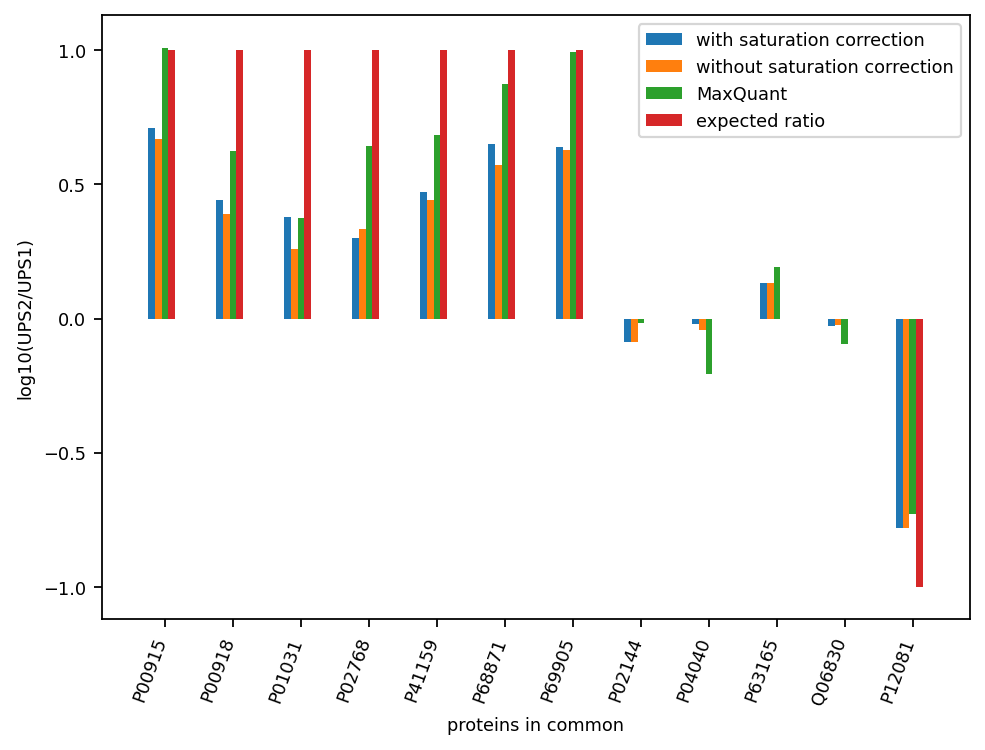

In [76]:
labels = combined_ratios_df.protein_code
ratio_with = np.log10(combined_ratios_df.ratio_with)
ratio_without = np.log10(combined_ratios_df.ratio_without)
mq_ratio = np.log10(combined_ratios_df.mq_ratio)
expected_ratio = np.log10(combined_ratios_df.expected_ratio)

x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

f, ax = plt.subplots()
f.set_figheight(5)
f.set_figwidth(7)
f.set_dpi(160)

plt.margins(0.06)
plt.title('')

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

rects1 = ax.bar(x - 2*width, ratio_with, width, label='with saturation correction')
rects2 = ax.bar(x - width, ratio_without, width, label='without saturation correction')
rects3 = ax.bar(x, mq_ratio, width, label='MaxQuant')
rects4 = ax.bar(x + width, expected_ratio, width, label='expected ratio')

# add text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('proteins in common', fontsize=8)
ax.set_ylabel('log10(UPS2/UPS1)', fontsize=8)
# ax.set_title('ratio of protein intensity')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=70, ha='right')
ax.legend(fontsize=8)

# create offset transform (x=5pt)
from matplotlib.transforms import ScaledTranslation
dx, dy = 5, 0
offset = ScaledTranslation(dx/f.dpi, dy/f.dpi, scale_trans=f.dpi_scale_trans)

# apply offset transform to all xticklabels
for label in ax.xaxis.get_majorticklabels():
    label.set_transform(label.get_transform() + offset)
    
plt.show()

In [77]:
f.savefig('{}/paper-2-figure-12.tiff'.format(expanduser('~')), dpi=300, bbox_inches='tight')

### compare relative intensities of top-3 peptides for each protein in UPS2 relative to a protein that was not corrected for saturation

In [78]:
ratios_df = combined_UPS2_df[['protein','average_intensity_with','average_intensity_without','intensity_adjusted']].copy()


#### use for the intensity reference the most intense protein that was not corrected for saturation

In [79]:
reference_row = combined_UPS2_df[combined_UPS2_df.protein.str.startswith('Q06830')].iloc[0]
reference_intensity = reference_row.average_intensity_with

In [80]:
ratios_df['ratio_with'] = ratios_df.average_intensity_with / reference_intensity
ratios_df['ratio_without'] = ratios_df.average_intensity_without / reference_intensity

In [81]:
ratios_df['expected_ratio'] = ratios_df.apply(lambda row: (ups2_d[row.protein.split('ups')[0]] / 1000) / (ups2_d[reference_row.protein.split('ups')[0]] / 1000), axis=1)

In [82]:
ratios_df

,protein,average_intensity_with,average_intensity_without,intensity_adjusted,ratio_with,ratio_without,expected_ratio
0,P00915ups|CAH1_HUMAN_UPS,51585.000000,46818.333333,True,6.266399,5.687358,10.0
1,P00918ups|CAH2_HUMAN_UPS,50821.333333,44914.333333,True,6.173631,5.456066,10.0
2,P01031ups|CO5_HUMAN_UPS,38016.333333,21627.333333,True,4.618116,2.627227,10.0
3,P02144ups|MYG_HUMAN_UPS,6117.333333,6117.333333,False,0.743116,0.743116,1.0
4,P02768ups|ALBU_HUMAN_UPS,115886.000000,85755.666667,True,14.077502,10.417355,10.0
...,...,...,...,...,...,...,...
140,P62988ups|UBIQ_HUMAN_UPS,18820.666667,18006.000000,True,2.286281,2.187318,10.0
141,P63165ups|SUMO1_HUMAN_UPS,3435.333333,3435.333333,False,0.417315,0.417315,1.0
142,P68871ups|HBB_HUMAN_UPS,45045.333333,40266.000000,True,5.471979,4.891399,10.0
143,P69905ups|HBA_HUMAN_UPS,18385.000000,18157.333333,True,2.233358,2.205701,10.0


In [83]:
ratios_df['ratio_with'].corr(ratios_df['expected_ratio'])

0.6353493197867337

In [84]:
ratios_df['ratio_without'].corr(ratios_df['expected_ratio'])

0.6521577171439819